# Classification: Multi-layer Perceptron Classifier

In [49]:
#IMPORT DATA
import pandas as pd
data = pd.read_csv('telemarketing_train_preprocess.csv')

In [50]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,1.444850,-0.746982,-0.571300,-3.969061,1.366417,-1.706389,-2.254135,1.860592,-1.400757,-1.031304,...,0,0,0,0,0,1,0,0,1,1
1,1.082169,0.100012,-0.571300,0.252494,-0.378985,-1.706389,-0.979221,-0.075950,-1.187102,-1.031304,...,0,0,1,0,0,0,0,1,0,1
2,0.447476,-0.363501,0.974844,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,0,0,0,0,1,0,1,0,0
3,-0.731238,-0.200104,-0.184764,0.252494,-0.378985,0.728330,0.745760,0.830517,0.795410,0.429467,...,0,0,0,0,1,0,0,1,0,0
4,-0.731238,2.884420,-0.184764,0.252494,-0.378985,-0.002086,-0.582693,-0.323168,0.333873,0.490545,...,0,1,0,0,0,0,0,1,0,0


target
0    11552
1     3448
dtype: int64


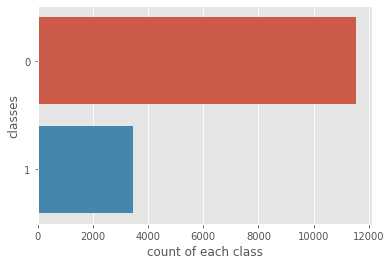

In [51]:
#Print class freq. through pandas 
print(data.groupby('target').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=data.target ,data=data)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [52]:
#gives information about the data types,columns, null value counts, memory usage etc
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            15000 non-null  float64
 1   duration                       15000 non-null  float64
 2   campaign                       15000 non-null  float64
 3   pdays                          15000 non-null  float64
 4   previous                       15000 non-null  float64
 5   emp.var.rate                   15000 non-null  float64
 6   cons.price.idx                 15000 non-null  float64
 7   cons.conf.idx                  15000 non-null  float64
 8   euribor3m                      15000 non-null  float64
 9   nr.employed                    15000 non-null  float64
 10  marital_divorced               15000 non-null  int64  
 11  marital_married                15000 non-null  int64  
 12  marital_single                 15000 non-null 

In [53]:
#basic statistic details about the data
data.describe(include="all")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
count,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2.237766e-16,5.155506e-17,-1.194137e-16,1.510525e-15,3.569663e-16,-5.268378e-16,2.312233e-14,-2.741011e-16,-4.016047e-17,-1.417787e-14,...,0.019600,0.184000,0.203467,0.218533,0.198333,0.195667,0.106733,0.838400,0.054867,0.229867
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,...,0.138626,0.387497,0.402590,0.413265,0.398758,0.396726,0.308784,0.368096,0.227727,0.420761
min,-2.091293e+00,-9.570631e-01,-5.713005e-01,-3.986032e+00,-3.789850e-01,-2.010729e+00,-2.254135e+00,-2.136100e+00,-1.536016e+00,-2.464081e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.312382e-01,-6.169318e-01,-5.713005e-01,2.524942e-01,-3.789850e-01,-1.036841e+00,-7.918325e-01,-4.673781e-01,-1.168884e+00,-7.399131e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-1.872161e-01,-3.268198e-01,-1.847643e-01,2.524942e-01,-3.789850e-01,7.283300e-01,-1.744530e-01,-2.819646e-01,7.948584e-01,4.294675e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.288169e-01,2.500697e-01,2.017719e-01,2.524942e-01,-3.789850e-01,9.109339e-01,7.457603e-01,8.305167e-01,8.528266e-01,9.015460e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,5.253004e+00,1.540926e+01,1.566322e+01,2.524942e-01,1.009343e+01,9.109339e-01,2.039078e+00,2.787660e+00,8.992012e-01,9.015460e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
#Separate X and y (explanatory variables and target variable)
X = data.iloc[:,0:-1]
column_names = list(X) 
y = data.iloc[:,-1] 

#X.head()
#y.head()

In [55]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)

(10500, 51)


## Multi-layer Perceptron classifier
![MLPC](multilayerperceptron_network.png)


In [56]:
'''Multi-layer Perceptron classifier'''
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(hidden_layer_sizes=(5, 2),
              activation='relu', alpha=0.01, batch_size='auto',              
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, solver='lbfgs', tol=0.01,
              validation_fraction=0.2, verbose=True)

# hidden_layer_sizes :  The ith element represents the number of neurons in the ith hidden layer, default (100,) . 
# activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
    #Activation function for the hidden layer.
    #        ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
    #        ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    #        ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
    #        ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
# solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
    #      ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
    #        ‘sgd’ refers to stochastic gradient descent.
    #        ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
# alpha : float, optional, default 0.0001
    #L2 penalty (regularization term) parameter.
# batch_size :Size of minibatches for stochastic optimizers. When set to “auto”, batch_size=min(200, n_samples)
# learning_rate : {‘constant’, ‘invscaling’, ‘adaptive’}, default ‘constant’
    #    ‘constant’ is a constant learning rate given by ‘learning_rate_init’.
    #    ‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)
    #    ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.
# learning_rate_init : double, optional, default 0.001
# max_iter : Maximum number of iterations.
# tol :Tolerance for the optimization.
# verbose : 
# validation_fraction : The proportion of training data to set aside as validation set for early stopping. 

model.fit(X_train, y_train)
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
'''Multi-layer Perceptron classifier'''
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(5, 2),(10,8,5)],  "max_iter": [2000], "alpha": [0.00001,0.1,1]}
#hidden_layer_sizes : The ith element represents the number of neurons in the ith hidden layer.

In [58]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)

In [59]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done   4 out of  18 | elapsed:   12.4s remaining:   43.3s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:   17.7s remaining:   46.1s
[Parallel(n_jobs=-1)]: Done   6 out of  18 | elapsed:   19.9s remaining:   39.8s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   22.2s remaining:   34.8s
[Parallel(n_jobs=-1)]: Done   8 out of  18 | elapsed:   29.9s remaining:   37.4s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   30.4s remaining:   30.4s
[Parallel(n_jobs=-1)]: Done  10 out of  18 | elapsed:   31.2s remaining:   24.9s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:   32.5s remaining:   20.7s
[Parallel(n_jobs=-1)]: Done  1

In [60]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.880571 using {'alpha': 1, 'hidden_layer_sizes': (10, 8, 5), 'max_iter': 2000}
0.875714 (0.001530) with: {'alpha': 1e-05, 'hidden_layer_sizes': (5, 2), 'max_iter': 2000}
0.869714 (0.001822) with: {'alpha': 1e-05, 'hidden_layer_sizes': (10, 8, 5), 'max_iter': 2000}
0.840190 (0.049649) with: {'alpha': 0.1, 'hidden_layer_sizes': (5, 2), 'max_iter': 2000}
0.875619 (0.000539) with: {'alpha': 0.1, 'hidden_layer_sizes': (10, 8, 5), 'max_iter': 2000}
0.880095 (0.002205) with: {'alpha': 1, 'hidden_layer_sizes': (5, 2), 'max_iter': 2000}
0.880571 (0.004320) with: {'alpha': 1, 'hidden_layer_sizes': (10, 8, 5), 'max_iter': 2000}


In [61]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [62]:
#This is your prediction on the TEST SET
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [63]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TEST SET***
f1_score:  0.736231884057971


In [64]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3466
           1       0.74      0.74      0.74      1034

    accuracy                           0.88      4500
   macro avg       0.83      0.83      0.83      4500
weighted avg       0.88      0.88      0.88      4500



In [65]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3192  274]
 [ 272  762]]


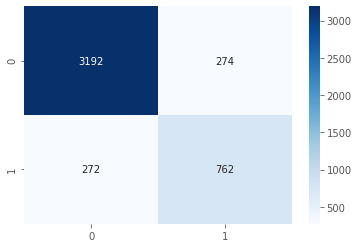

In [66]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


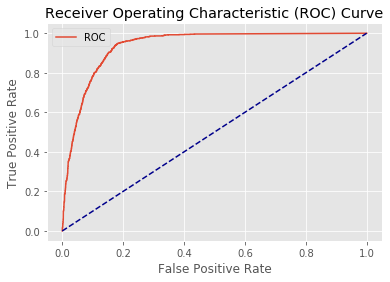

AUC: 0.94


In [67]:
from sklearn import metrics

model=MLPClassifier(hidden_layer_sizes=(10,8,5), alpha=0.01, max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)